In [1]:
pip install numpy matplotlib imageio


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 41.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 15.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Processing frame 1/60...


C:\Users\juanj\AppData\Local\Temp\ipykernel_11020\2074698138.py:193: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))


Processing frame 2/60...
Processing frame 3/60...
Processing frame 4/60...
Processing frame 5/60...
Processing frame 6/60...
Processing frame 7/60...
Processing frame 8/60...
Processing frame 9/60...
Processing frame 10/60...
Processing frame 11/60...
Processing frame 12/60...
Processing frame 13/60...
Processing frame 14/60...
Processing frame 15/60...
Processing frame 16/60...
Processing frame 17/60...
Processing frame 18/60...
Processing frame 19/60...
Processing frame 20/60...
Processing frame 21/60...
Processing frame 22/60...
Processing frame 23/60...
Processing frame 24/60...
Processing frame 25/60...
Processing frame 26/60...
Processing frame 27/60...
Processing frame 28/60...
Processing frame 29/60...
Processing frame 30/60...
Processing frame 31/60...
Processing frame 32/60...
Processing frame 33/60...
Processing frame 34/60...
Processing frame 35/60...
Processing frame 36/60...
Processing frame 37/60...
Processing frame 38/60...
Processing frame 39/60...
Processing frame 40/

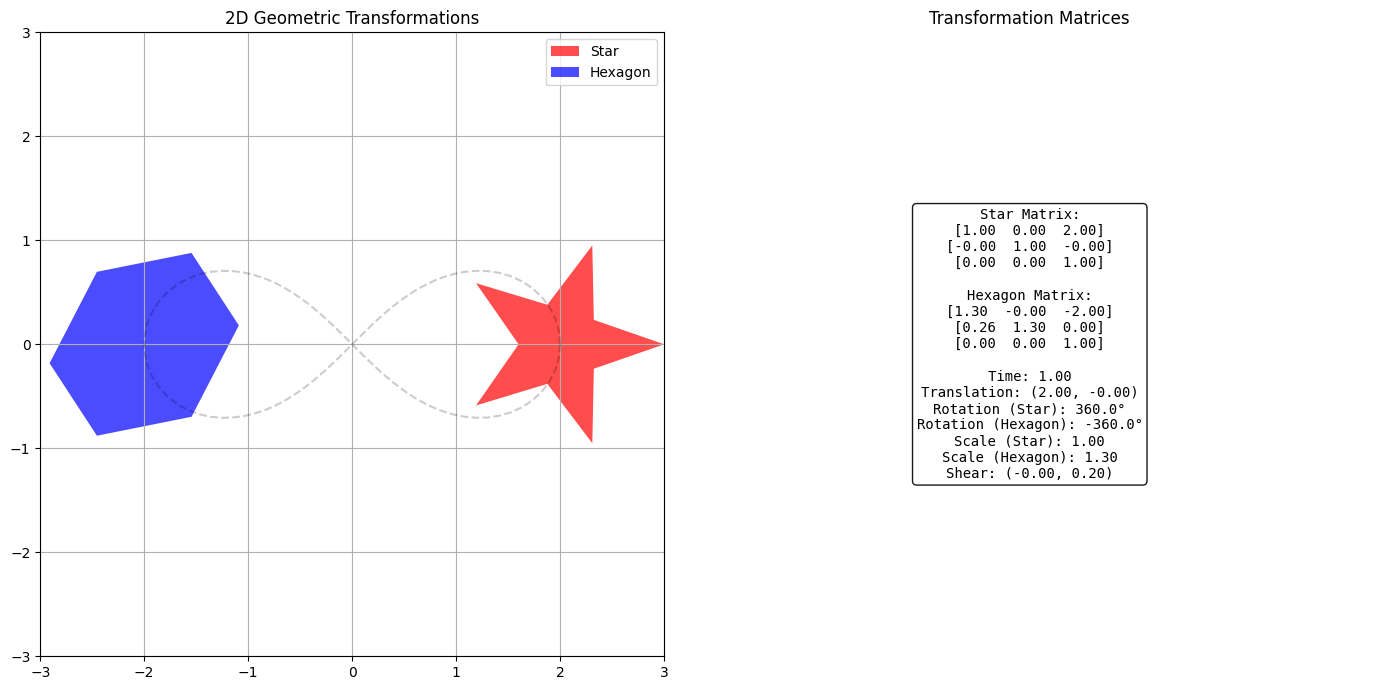

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Function that generates translation matrix given displacements tx and ty
def traslacion_matriz(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

# Function that generates rotation matrix for an angle in degrees
def rotacion_matriz(angulo_grados):
    angulo_rad = np.radians(angulo_grados)
    cos_theta = np.cos(angulo_rad)
    sin_theta = np.sin(angulo_rad)
    return np.array([
        [cos_theta, -sin_theta, 0],
        [sin_theta,  cos_theta, 0],
        [0,          0,         1]
    ])

# Function that generates scaling matrix given factors sx and sy
def escala_matriz(sx, sy):
    return np.array([
        [sx, 0,  0],
        [0,  sy, 0],
        [0,  0,  1]
    ])

# Function that generates shear matrix
def cizalla_matriz(shx, shy):
    return np.array([
        [1,   shx, 0],
        [shy, 1,   0],
        [0,   0,   1]
    ])

# Applies a transformation matrix to a set of points
def aplicar_transformacion(puntos, matriz):
    puntos_h = np.vstack((puntos, np.ones(puntos.shape[1])))
    resultado_h = matriz @ puntos_h
    return resultado_h[:2, :]

# Create a 5-pointed star
def crear_estrella(centro=(0, 0), radio_ext=1, radio_int=0.4):
    puntas = 5
    angulos = np.linspace(0, 2*np.pi, puntas*2, endpoint=False)
    
    # Alternate between outer and inner radius
    radios = np.array([radio_ext, radio_int] * puntas)
    
    # Calculate vertex coordinates
    x = centro[0] + radios * np.cos(angulos)
    y = centro[1] + radios * np.sin(angulos)
    
    return np.array([x, y])

# Create a hexagon
def crear_hexagono(centro=(0, 0), radio=0.7):
    angulos = np.linspace(0, 2*np.pi, 7)[:-1]  # 6 points
    x = centro[0] + radio * np.cos(angulos)
    y = centro[1] + radio * np.sin(angulos)
    return np.array([x, y])

# Directory to save frames
frames_dir = "frames_avanzados"
if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)

# Figure configuration
num_frames = 60
frames = []

# Create figures: star and hexagon
estrella = crear_estrella()
hexagono = crear_hexagono()

# Configure figure and axes for plot and matrix text
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title('2D Geometric Transformations')

# Right axis adjustments (to show matrices)
ax2.axis('off')
ax2.set_title('Transformation Matrices')

# Loop to generate each animation frame
for i in range(num_frames):
    print(f"Processing frame {i+1}/{num_frames}...")
    t = i / (num_frames - 1)  # normalized parameter from 0 to 1
    
    # Variable transformation parameters
    angulo_estrella = 72 * t * 5  # star rotation (5 × 72° = 360°)
    angulo_hexagono = -60 * t * 6  # inverse hexagon rotation (6 × 60° = 360°)
    
    # Movement in lemniscate shape (figure-8 curve)
    a = 2  # lemniscate amplitude
    tx = a * np.cos(2*np.pi*t) / (1 + np.sin(2*np.pi*t)**2)
    ty = a * np.sin(2*np.pi*t) * np.cos(2*np.pi*t) / (1 + np.sin(2*np.pi*t)**2)
    
    # Pulsating scale
    escala_estrella = 1 + 0.3 * np.sin(4 * np.pi * t)
    escala_hexagono = 1 + 0.3 * np.cos(4 * np.pi * t)
    
    # Oscillating shear
    cizalla_x = 0.3 * np.sin(2 * np.pi * t)
    cizalla_y = 0.2 * np.cos(2 * np.pi * t)
    
    # Build transformation matrices for star
    T_estrella = traslacion_matriz(tx, ty)
    R_estrella = rotacion_matriz(angulo_estrella)
    S_estrella = escala_matriz(escala_estrella, escala_estrella)
    Sh_estrella = cizalla_matriz(cizalla_x, 0)
    
    # Combined matrix for star: first scale, then rotate, then shear, finally translate
    M_estrella = T_estrella @ Sh_estrella @ R_estrella @ S_estrella
    
    # Build transformation matrices for hexagon
    T_hexagono = traslacion_matriz(-tx, -ty)
    R_hexagono = rotacion_matriz(angulo_hexagono)
    S_hexagono = escala_matriz(escala_hexagono, escala_hexagono)
    Sh_hexagono = cizalla_matriz(0, cizalla_y)
    
    # Combined matrix for hexagon
    M_hexagono = T_hexagono @ Sh_hexagono @ R_hexagono @ S_hexagono
    
    # Apply transformations
    estrella_transformada = aplicar_transformacion(estrella, M_estrella)
    hexagono_transformado = aplicar_transformacion(hexagono, M_hexagono)
    
    # Clear axes before drawing
    ax1.clear()
    ax2.clear()
    
    # Reconfigure limits and styles
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.set_aspect('equal')
    ax1.grid(True)
    ax1.set_title('2D Geometric Transformations')
    
    # Draw lemniscate trajectory as a guide
    theta = np.linspace(0, 2*np.pi, 100)
    x_lemn = a * np.cos(theta) / (1 + np.sin(theta)**2)
    y_lemn = a * np.sin(theta) * np.cos(theta) / (1 + np.sin(theta)**2)
    ax1.plot(x_lemn, y_lemn, 'k--', alpha=0.2)
    
    # Draw transformed figures
    ax1.fill(estrella_transformada[0], estrella_transformada[1], 'r', alpha=0.7, label='Star')
    ax1.fill(hexagono_transformado[0], hexagono_transformado[1], 'b', alpha=0.7, label='Hexagon')
    ax1.legend(loc='upper right')
    
    # Show matrix information
    ax2.axis('off')
    ax2.set_title('Transformation Matrices')
    
    matriz_info = "Star Matrix:\n"
    matriz_info += f"[{M_estrella[0,0]:.2f}  {M_estrella[0,1]:.2f}  {M_estrella[0,2]:.2f}]\n"
    matriz_info += f"[{M_estrella[1,0]:.2f}  {M_estrella[1,1]:.2f}  {M_estrella[1,2]:.2f}]\n"
    matriz_info += f"[{M_estrella[2,0]:.2f}  {M_estrella[2,1]:.2f}  {M_estrella[2,2]:.2f}]\n\n"
    
    matriz_info += "Hexagon Matrix:\n"
    matriz_info += f"[{M_hexagono[0,0]:.2f}  {M_hexagono[0,1]:.2f}  {M_hexagono[0,2]:.2f}]\n"
    matriz_info += f"[{M_hexagono[1,0]:.2f}  {M_hexagono[1,1]:.2f}  {M_hexagono[1,2]:.2f}]\n"
    matriz_info += f"[{M_hexagono[2,0]:.2f}  {M_hexagono[2,1]:.2f}  {M_hexagono[2,2]:.2f}]\n\n"
    
    param_info = f"Time: {t:.2f}\n"
    param_info += f"Translation: ({tx:.2f}, {ty:.2f})\n"
    param_info += f"Rotation (Star): {angulo_estrella:.1f}°\n"
    param_info += f"Rotation (Hexagon): {angulo_hexagono:.1f}°\n"
    param_info += f"Scale (Star): {escala_estrella:.2f}\n"
    param_info += f"Scale (Hexagon): {escala_hexagono:.2f}\n"
    param_info += f"Shear: ({cizalla_x:.2f}, {cizalla_y:.2f})"
    
    ax2.text(0.5, 0.5, matriz_info + param_info, fontsize=10, ha='center', va='center', 
             family='monospace', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    # Save frame image
    frame_path = f"{frames_dir}/frame_{i:03d}.png"
    plt.tight_layout()
    plt.savefig(frame_path)
    
    # Read saved image and add it to frames list
    try:
        frames.append(imageio.imread(frame_path))
    except Exception as e:
        print(f"Error reading frame {frame_path}: {e}")

# Create animated GIF
try:
    gif_path = 'transformaciones_avanzadas.gif'
    imageio.mimsave(gif_path, frames, duration=75, loop=0)
    print(f"Animation saved as '{gif_path}'")
except Exception as e:
    print(f"Error creating GIF: {e}")

print("Process completed!")